## Final Project Submission

Please fill out:
* Student name: Marissa Bush
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [71]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

#import folium

In [72]:
ls

CONTRIBUTING.md    README.md          halfway-there.gif  student1.ipynb
LICENSE.md         data/              student.ipynb


# Business Case

The budding Zillow-type company, J.Hughes Inc., is buying and flipping houses in the Seattle area. They would like to know the types of housing features to prioritize to make the most profit. Knowing which features have the biggest impact on housing prices, J. Hughes Inc. could then make data-driven decisions on which houses to purchase to optimize making a profit on.

# Obtain

In [73]:
df = pd.read_csv('data/kc_house_data.csv') 
df.drop(['view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'sqft_living15', 'sqft_lot15'],
        axis = 1, inplace = True)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode,lat,long
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1955,98178,47.5112,-122.257
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,98125,47.7210,-122.319
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,98028,47.7379,-122.233
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,98136,47.5208,-122.393
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,98074,47.6168,-122.045


In [74]:
# Folium map to show location of houses, use first 4 numbers of zip and latitude, houses under 1.5 million,
# houses over 1.5 million

# Scrub

In [75]:
# Check data types
df.info()
# All columns are in integer/float format which will work for now

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   date         21597 non-null  object 
 2   price        21597 non-null  float64
 3   bedrooms     21597 non-null  int64  
 4   bathrooms    21597 non-null  float64
 5   sqft_living  21597 non-null  int64  
 6   sqft_lot     21597 non-null  int64  
 7   floors       21597 non-null  float64
 8   waterfront   19221 non-null  float64
 9   condition    21597 non-null  int64  
 10  grade        21597 non-null  int64  
 11  yr_built     21597 non-null  int64  
 12  zipcode      21597 non-null  int64  
 13  lat          21597 non-null  float64
 14  long         21597 non-null  float64
dtypes: float64(6), int64(8), object(1)
memory usage: 2.5+ MB


In [76]:
# Check for outliers in the dataset
df.describe()
# Bedrooms has an outlier of 33 rooms, watefront looks like it is categorical, as does the columns condtion and grade. 

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode,lat,long
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,3.409825,7.657915,1970.999676,98077.951845,47.560093,-122.213982
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.650546,1.173200,29.375234,53.513072,0.138552,0.140724
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,1900.000000,98001.000000,47.155900,-122.519000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1951.000000,98033.000000,47.471100,-122.328000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1975.000000,98065.000000,47.571800,-122.231000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,1997.000000,98118.000000,47.678000,-122.125000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,2015.000000,98199.000000,47.777600,-121.315000


In [77]:
# Check for null values
df.isna().sum()
# Waterfront is the only column with null values

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
zipcode           0
lat               0
long              0
dtype: int64

### id

In [78]:
# Drop id column - not needed
df.drop('id', axis=1, inplace=True)

### price

In [79]:
# Histograms are for continuous

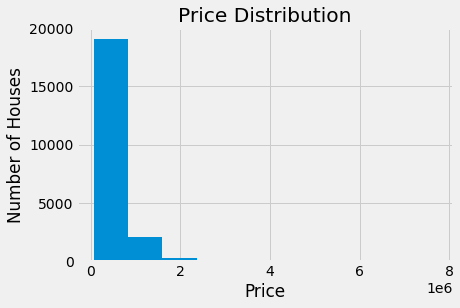

In [80]:
# Check price distribution
df['price'].hist()
plt.title('Price Distribution');
plt.xlabel('Price');
plt.ylabel('Number of Houses');
# The majority of houses are below the price of 2 (million?)

In [81]:
df_og = df.copy()
# remove houses above 1.5 million, boolean mask
df = df[df['price'] <= 1500000]
# Reduce the data to only houses equal to or below 1.5 million 

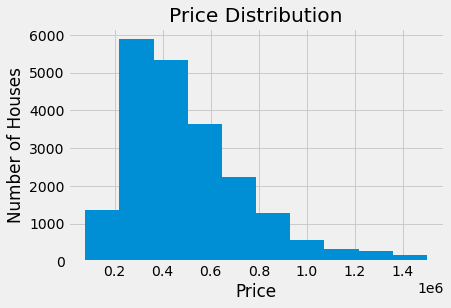

In [82]:
# Plot price with a histogram
df['price'].hist()
plt.title('Price Distribution');
plt.xlabel('Price');
plt.ylabel('Number of Houses');
# The majority of houses are in the .3 to .5 price range

In [83]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode,lat,long
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1955,98178,47.5112,-122.257
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,98125,47.7210,-122.319
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,98028,47.7379,-122.233
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,98136,47.5208,-122.393
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,98074,47.6168,-122.045


### bedrooms

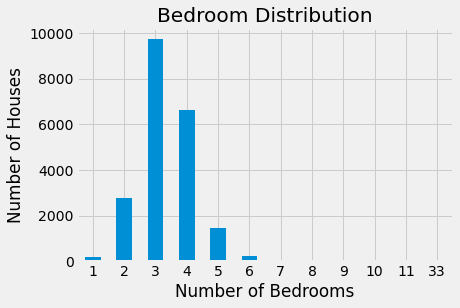

In [84]:
# Plot bedrooms as categorical - ordinal
df['bedrooms'].value_counts().sort_index().plot(kind = 'bar')
plt.xticks(rotation = 0);
plt.title('Bedroom Distribution');
plt.xlabel('Number of Bedrooms');
plt.ylabel('Number of Houses');
# Houses with 1 or 2 bedrooms are the most common in the dataset

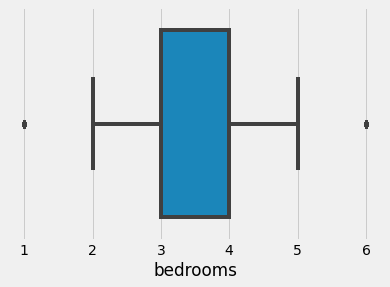

In [85]:
# Drop houses that have 7 or more bedrooms
df = df[df['bedrooms'] < 7]
sns.boxplot(x = df['bedrooms']);
# Box plot shows a normal distribution

### bathrooms

In [86]:
# hist, ordinal

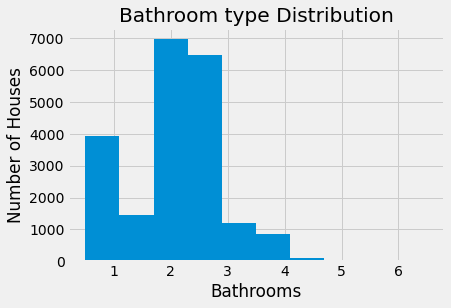

In [87]:
# Check bathroom types distribution
df['bathrooms'].hist()
plt.title('Bathroom type Distribution');
plt.xlabel('Bathrooms');
plt.ylabel('Number of Houses');
# There appears to be an outlier and most of the houses have 2 or 3 bathrooms

/Users/jeffreyherman/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


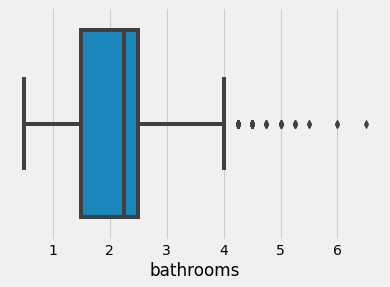

In [88]:
# Boxplot to detect outliers
sns.boxplot(df['bathrooms']);
# A handful of outliers above 4

In [89]:
# Drop houses that have more than 4 bathrooms
df = df[df['bathrooms'] < 4]
# The column 'bathrooms' will only have houses that have less than or equal to 4 bathrooms

### sqft_living

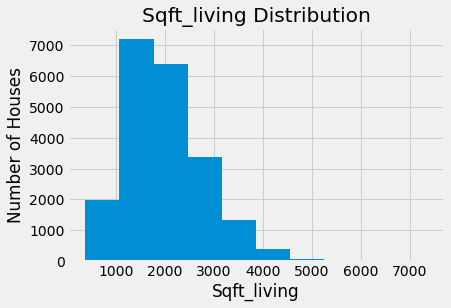

In [90]:
# Check sqft_living distribution
df['sqft_living'].hist()
plt.title('Sqft_living Distribution');
plt.xlabel('Sqft_living');
plt.ylabel('Number of Houses');
# There appears to be some outliers above 5000 sqft_living

/Users/jeffreyherman/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


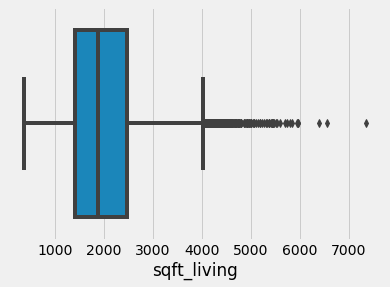

In [91]:
# Box plot for outliers
sns.boxplot(df['sqft_living']);
# Outliers above 7000 sqft_living

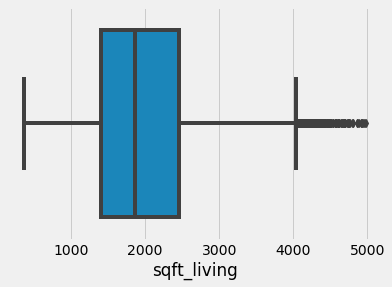

In [92]:
# Drop outliers in sqft_living
df = df[df['sqft_living'] < 5000]
sns.boxplot(x = df['sqft_living']);
# Shows normal distribution
# Should I drop outliers above 4000 or 5000?

### sqft_lot

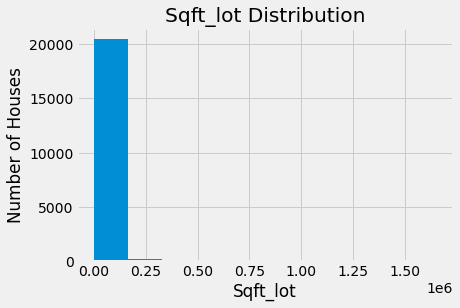

In [93]:
# Check sqft_lot distribution
df['sqft_lot'].hist()
plt.title('Sqft_lot Distribution');
plt.xlabel('Sqft_lot');
plt.ylabel('Number of Houses');
# Drop outliers

In [94]:
df['sqft_lot'].describe() 

count    2.076300e+04
mean     1.447540e+04
std      3.916158e+04
min      5.200000e+02
25%      5.000000e+03
50%      7.508000e+03
75%      1.036750e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

In [95]:
print(f'Number of houses before we drop outliers from sqft lot {len(df)}')

Number of houses before we drop outliers from sqft lot 20763


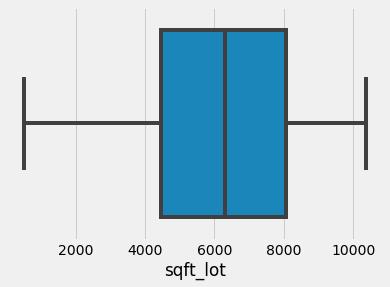

In [96]:
# sns.boxplot(df['sqft_lot']);
# Drop houses that are above the 75 percentile
df = df[df['sqft_lot'] < 1.036750e+04]
sns.boxplot(x = df['sqft_lot']);
# The majority of houses have between 4000 and 8000 sqft_lot

In [97]:
print(f'Number of houses after we drop outliers from sqft lot {len(df)}')

Number of houses after we drop outliers from sqft lot 15572


### floors

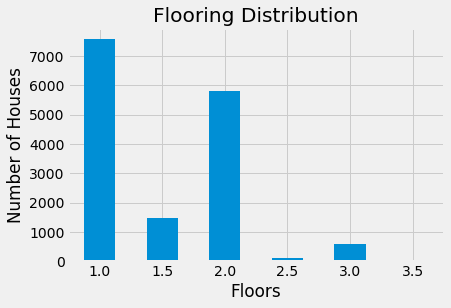

In [98]:
# Plot a bar chart to check distribution of flooring
df['floors'].value_counts().sort_index().plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.title('Flooring Distribution');
plt.xlabel('Floors');
plt.ylabel('Number of Houses');
# Most houses have either 1 or 2 floors

### waterfront

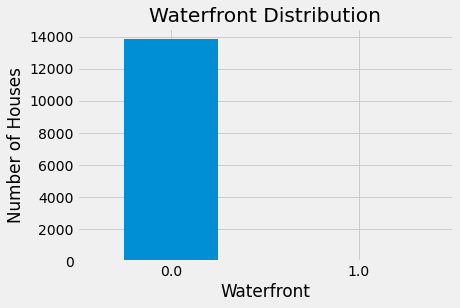

In [99]:
# Plot a bar chart for waterfront
df['waterfront'].value_counts().sort_index().plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.title('Waterfront Distribution');
plt.xlabel('Waterfront');
plt.ylabel('Number of Houses');
# Waterfront is categorical as it has two categories. Also, the majority of the homes are not waterfront.

In [100]:
# Check for unique values
df['waterfront'].unique()

array([nan,  0.,  1.])

In [101]:
# Check the perecentage of houses with and without waterfront
df['waterfront'].value_counts(normalize = True)
# 99% of houses do not have waterfront

0.0    0.998845
1.0    0.001155
Name: waterfront, dtype: float64

In [102]:
# fill null values with 0, due to the high percentage of most houses not having waterfront
df['waterfront'].fillna(value = 0.0, inplace = True)

### condition

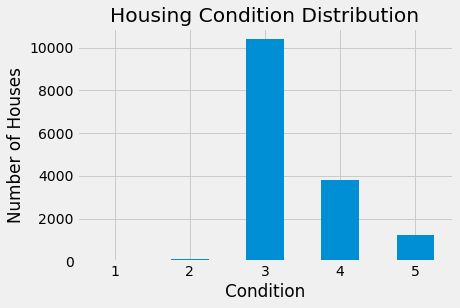

In [103]:
# Graph condition as a bar chart
df['condition'].value_counts().sort_index().plot(kind = 'bar')
plt.xticks(rotation = 0);
plt.title('Housing Condition Distribution');
plt.xlabel('Condition');
plt.ylabel('Number of Houses');
# The majority of houses have condition 3
# ordinal

### grade

In [104]:
# ordinal

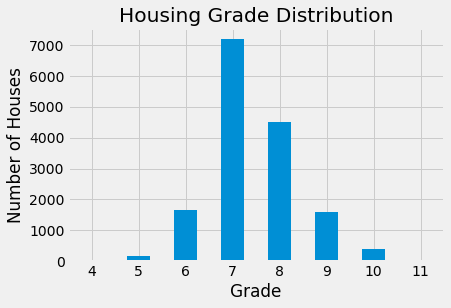

In [105]:
# Graph condition as a bar chart
df['grade'].value_counts().sort_index().plot(kind = 'bar')
plt.xticks(rotation = 0);
plt.title('Housing Grade Distribution');
plt.xlabel('Grade');
plt.ylabel('Number of Houses');
# Majority of the houses have a grade 7

### yr_built

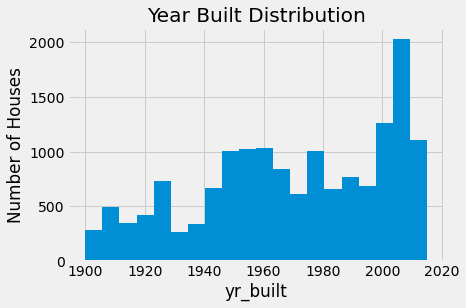

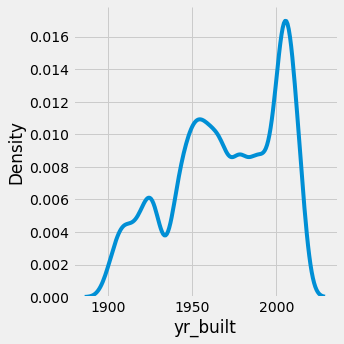

In [106]:
# Check price distribution
df['yr_built'].hist(bins = 20)
plt.title('Year Built Distribution');
plt.xlabel('yr_built');
plt.ylabel('Number of Houses')
sns.displot(df['yr_built'], kind = 'kde');
# Most houses were built after 1950 and drops off after 2000

### Age House Sold (new feature)

In [107]:
# Change date dtype to datetime
df['date'] = pd.to_datetime(df['date'])

In [108]:
df.dtypes

date           datetime64[ns]
price                 float64
bedrooms                int64
bathrooms             float64
sqft_living             int64
sqft_lot                int64
floors                float64
waterfront            float64
condition               int64
grade                   int64
yr_built                int64
zipcode                 int64
lat                   float64
long                  float64
dtype: object

In [109]:
# Create new column 'age at sold' by subtracting 'date' and 'yr_built'
age_at_sold = df['date'].dt.year - df['yr_built']
df['age_at_sold'] = age_at_sold
df.head()
# New column is now a continuous feature

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode,lat,long,age_at_sold
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1955,98178,47.5112,-122.257,59
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,98125,47.7210,-122.319,63
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,98028,47.7379,-122.233,82
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,98136,47.5208,-122.393,49
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,98074,47.6168,-122.045,28


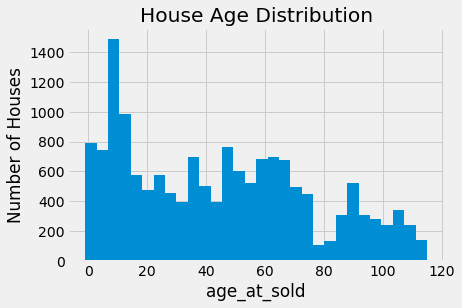

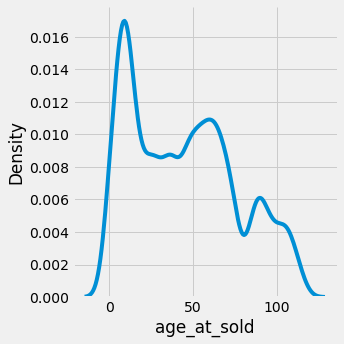

In [110]:
# Plot the column 'age_at_sold' with a histogram
df['age_at_sold'].hist(bins = 30)
plt.title('House Age Distribution');
plt.xlabel('age_at_sold');
plt.ylabel('Number of Houses')
sns.displot(df['age_at_sold'], kind = 'kde');
# The majority of the houses are around 9 years

In [111]:
# Drop columns 'date' and 'yr_built'
df.drop('date', axis=1, inplace=True)
df.drop('yr_built', axis = 1, inplace = True)

###  zip4

In [112]:
# Trim zipcode to only the first four numbers
df['zipcode'] = df['zipcode'].astype(str) 
df['zip4'] = df['zipcode'].map(lambda x: x[:4])
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,zipcode,lat,long,age_at_sold,zip4
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,98178,47.5112,-122.257,59,9817
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,98125,47.7210,-122.319,63,9812
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,98028,47.7379,-122.233,82,9802
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,98136,47.5208,-122.393,49,9813
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,98074,47.6168,-122.045,28,9807


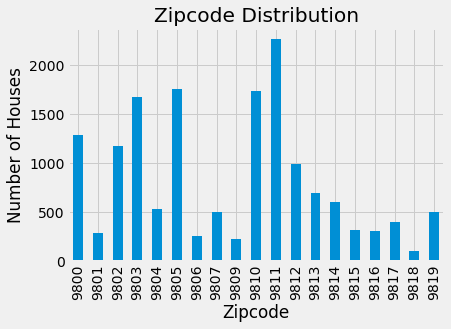

In [113]:
# View zipcode distribution of data
df['zip4'].value_counts().sort_index().plot(kind = 'bar')
plt.title('Zipcode Distribution');
plt.xlabel('Zipcode')
plt.ylabel('Number of Houses');
# Majority of houses start with 9811. In contrast, very few houses start with the zipcode to 9818

Text(0, 0.5, 'Price')

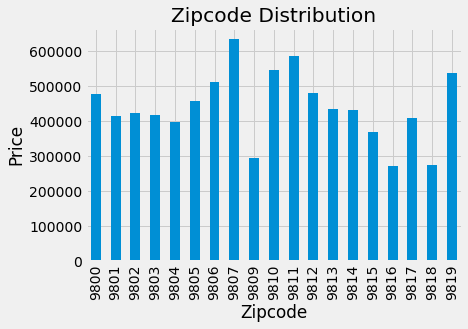

In [114]:
# Bar graph to view zipcode distribution vs price
df.groupby("zip4")['price'].mean().plot(kind = "bar")
plt.title('Zipcode Distribution');
plt.xlabel('Zipcode');
plt.ylabel('Price')
# The most expensive houses are located in the zipcode 9807 with the least expensive in the zip code 9809

### zipcode

In [115]:
df.drop('zipcode', axis=1, inplace=True)

### lat

In [116]:
df.drop('lat', axis=1, inplace=True)

### long

In [117]:
df.drop('long', axis=1, inplace=True)

### Check for linear relationships

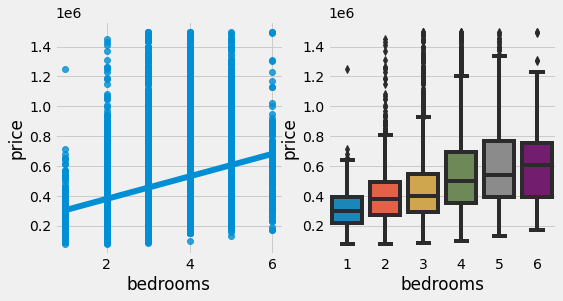

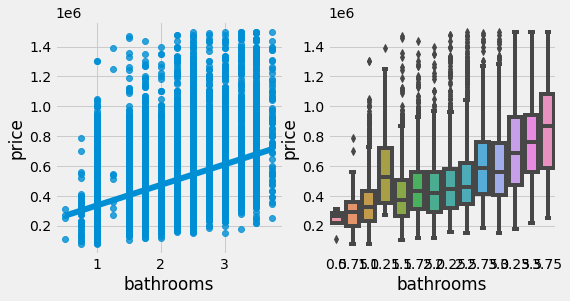

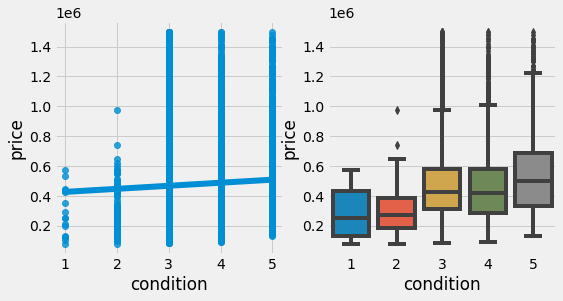

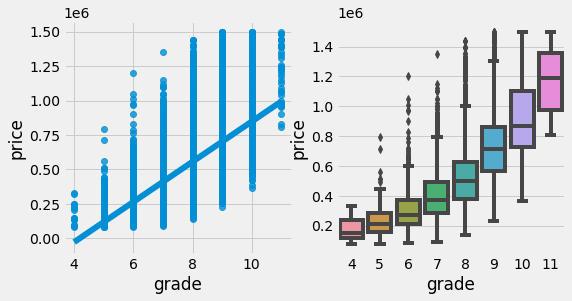

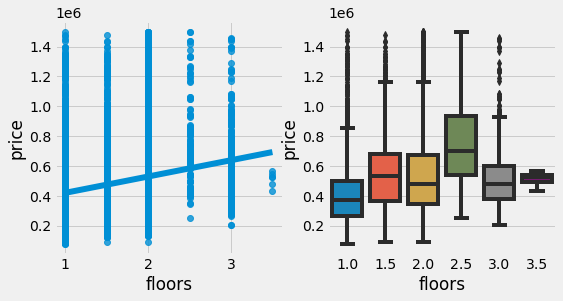

In [118]:
# Ordinal features - plot a regplot and boxplot to view if there are linear relationships
ord_feats = ['bedrooms', 'bathrooms', 'condition', 'grade', 'floors']
for feat in ord_feats:
    fig = plt.figure(figsize = (8, 4))
    ax1 = plt.subplot(121)
    sns.regplot(x = feat, y = 'price', data = df, ax = ax1)
    ax2 = plt.subplot(122)
    sns.boxplot(x = feat, y ='price', data = df, ax = ax2)
    plt.show()
# Linear relationship measured with the slope - how strong that line is. With box plot, look to the median line - 
# if it increases or decreases
# Bathroom could be categorical  - see 4th greenish box
# Condition is not linear
# Grade is linear - shows a strong relationship with price - increase as grade goes up
# Floors is non-linear - 
# Dummy encode floors, condition, and zipcode

## Linearity

In [119]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,age_at_sold,zip4
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,59,9817
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,63,9812
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,82,9802
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,49,9813
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,28,9807


In [120]:
# Create a list of continuous variables
cont = ['sqft_living', 'sqft_lot','age_at_sold']

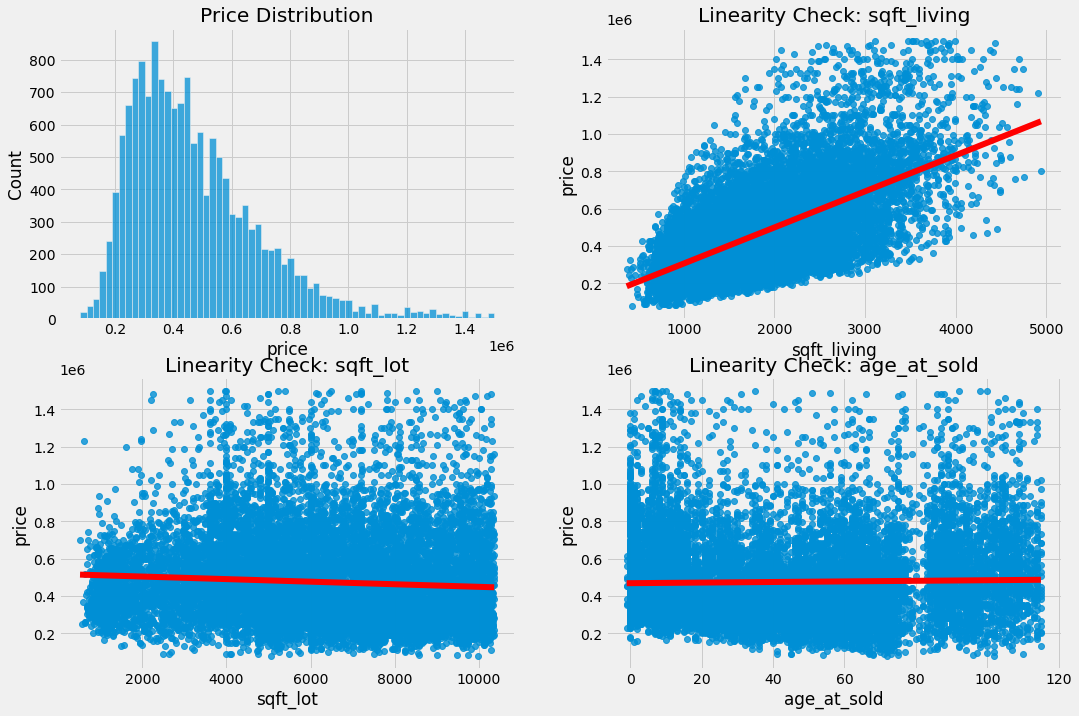

In [121]:
# Check for linearity with the continuous variables
fig, axes = plt.subplots(2, 2, figsize=(16, 11))

sns.histplot(df['price'], ax=axes[0][0]).set_title('Price Distribution')

for feat, ax in zip(cont, axes.flatten()[1:]): 
  sns.regplot(x = feat,y = 'price', data=df, ax=ax, line_kws={"color": "red"}).set_title(f'Linearity Check: {feat}')
# Sqft_living appears to be the only positively correlated feature


## Multicollinearity

In [122]:
# View columns
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'age_at_sold', 'zip4'],
      dtype='object')

In [123]:
# Create a list of continuous and ordinal categorical features
cont_ordinal = ['sqft_living', 'sqft_lot', 'age_at_sold', 'grade', 'bathrooms','bedrooms']

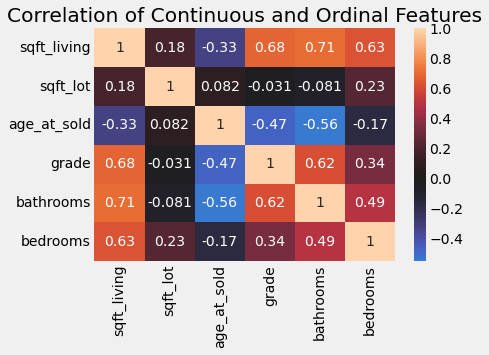

In [124]:
# Correlation heat map with continuous and ordinal features
corr = df[cont_ordinal].corr()
sns.heatmap(corr, center=0, annot=True).set_title('Correlation of Continuous and Ordinal Features');
# Keep all features

## Homoscedasticity

In [125]:
# Normalize data
# Z scoring

In [126]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,age_at_sold
count,1.557200e+04,15572.000000,15572.000000,15572.000000,15572.000000,15572.000000,15572.000000,15572.000000,15572.000000,15572.000000
mean,4.759425e+05,3.272348,2.015733,1875.094272,6145.652903,1.506422,0.001027,3.395903,7.450231,44.514642
std,2.285743e+05,0.856770,0.692070,710.058535,2448.913695,0.553441,0.032039,0.648393,0.962412,31.612271
min,8.000000e+04,1.000000,0.500000,370.000000,520.000000,1.000000,0.000000,1.000000,4.000000,-1.000000
25%,3.100000e+05,3.000000,1.500000,1340.000000,4446.750000,1.000000,0.000000,3.000000,7.000000,14.000000
50%,4.270000e+05,3.000000,2.000000,1770.000000,6300.000000,1.500000,0.000000,3.000000,7.000000,43.000000
75%,5.890000e+05,4.000000,2.500000,2310.000000,8075.000000,2.000000,0.000000,4.000000,8.000000,67.000000
max,1.500000e+06,6.000000,3.750000,4940.000000,10367.000000,3.500000,1.000000,5.000000,11.000000,115.000000


# Explore

In [127]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'age_at_sold', 'zip4'],
      dtype='object')

# Define our key point when map open it
map1 = folium.Map(location=[47.608013, -122.335167])
def plotDot(point):
    '''input: series that contains a numeric named latitude and a numeric named longitude
    this function creates a CircleMarker and adds it to your this_map'''
    folium.CircleMarker(location=[point.lat, point.long],
                        radius=2,
                        weight=5, color = '#CE1126').add_to(map1)
def plotDotabove15(point):
    '''input: series that contains a numeric named latitude and a numeric named longitude
    this function creates a CircleMarker and adds it to your this_map'''
    folium.CircleMarker(location=[point.lat, point.long],
                        radius=2,
                        weight=5, color = '#000000').add_to(map1)
df_og[df_og['price'] <= 1500000].apply(plotDot, axis = 1)
df_og[df_og['price'] > 1500000].apply(plotDotabove15, axis = 1)


map1
# The most expensive houses appear to be on the waterfront

### Check for categorical variables

In [128]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,age_at_sold,zip4
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,59,9817
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,63,9812
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,82,9802
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,49,9813
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,28,9807


In [129]:
df.isnull().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
condition      0
grade          0
age_at_sold    0
zip4           0
dtype: int64

In [130]:
# Sort categorical variables into a list
cat = ['bedrooms', 'floors', 'waterfront', 'condition', 'zip4']

In [131]:
# Different plots for continuous and categotical features

# MARISSA 
- Had to add this to make the join perform correctly.  Otherwise there were missing values.  **Let me know if you don't understand why I did this**

In [136]:
df.reset_index(inplace = True)

In [137]:
#creating instance of one-hot-encoder
encoder = OneHotEncoder(drop = 'first')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(df[cat]).toarray())

# update column names 
cols = []
for x in encoder.get_feature_names():
    if 'x0' in x:
        cols.append(x.replace('x0', 'bedrooms'))
    elif 'x1' in x:
        cols.append(x.replace('x1', 'floors'))
    elif 'x2' in x:
        cols.append(x.replace('x2', 'waterfront'))
    elif 'x3' in x:
        cols.append(x.replace('x3', 'condition'))
    elif 'x4' in x:
        cols.append(x.replace('x4', 'zip4'))
    else:
        cols.append(x)
# set encoder_df columns equal cols 

encoder_df.columns = cols


#merge one-hot encoded columns back with original DataFrame
df_ohe = df.join(encoder_df, )

#view final df
df_ohe.head()

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,...,zip4_9810,zip4_9811,zip4_9812,zip4_9813,zip4_9814,zip4_9815,zip4_9816,zip4_9817,zip4_9818,zip4_9819
0,0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [134]:
df.shape

(15572, 11)

In [138]:
df_ohe.isnull().sum()

index             0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
condition         0
grade             0
age_at_sold       0
zip4              0
bedrooms_2        0
bedrooms_3        0
bedrooms_4        0
bedrooms_5        0
bedrooms_6        0
floors_1.5        0
floors_2.0        0
floors_2.5        0
floors_3.0        0
floors_3.5        0
waterfront_1.0    0
condition_2       0
condition_3       0
condition_4       0
condition_5       0
zip4_9801         0
zip4_9802         0
zip4_9803         0
zip4_9804         0
zip4_9805         0
zip4_9806         0
zip4_9807         0
zip4_9809         0
zip4_9810         0
zip4_9811         0
zip4_9812         0
zip4_9813         0
zip4_9814         0
zip4_9815         0
zip4_9816         0
zip4_9817         0
zip4_9818         0
zip4_9819         0
dtype: int64

In [139]:
for x in df_ohe:
    print (x)

index
price
bedrooms
bathrooms
sqft_living
sqft_lot
floors
waterfront
condition
grade
age_at_sold
zip4
bedrooms_2
bedrooms_3
bedrooms_4
bedrooms_5
bedrooms_6
floors_1.5
floors_2.0
floors_2.5
floors_3.0
floors_3.5
waterfront_1.0
condition_2
condition_3
condition_4
condition_5
zip4_9801
zip4_9802
zip4_9803
zip4_9804
zip4_9805
zip4_9806
zip4_9807
zip4_9809
zip4_9810
zip4_9811
zip4_9812
zip4_9813
zip4_9814
zip4_9815
zip4_9816
zip4_9817
zip4_9818
zip4_9819


In [140]:
new_cols = []
for x in df_ohe:
    new_cols.append(x.replace(".", "_"))
df_ohe.columns = new_cols
df_ohe.head()

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,...,zip4_9810,zip4_9811,zip4_9812,zip4_9813,zip4_9814,zip4_9815,zip4_9816,zip4_9817,zip4_9818,zip4_9819
0,0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [141]:
# Drop categorical features to avoid redundancy
df_ohe.drop((cat), axis=1, inplace=True)

# Model

In [142]:
# Model 1 - Basic model, not a lot of features

In [143]:
#train['floors_2.5']

KeyError: 'floors_2.5'

In [144]:
train, test = train_test_split(df_ohe)
train.head()

,index,price,bathrooms,sqft_living,sqft_lot,grade,age_at_sold,bedrooms_2,bedrooms_3,bedrooms_4,...,zip4_9810,zip4_9811,zip4_9812,zip4_9813,zip4_9814,zip4_9815,zip4_9816,zip4_9817,zip4_9818,zip4_9819
14487,20377,300000.0,3.00,2744,9926,7,8,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
977,1398,292000.0,2.50,2060,5950,8,14,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15320,21302,641000.0,3.50,3420,6403,8,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
135,177,385000.0,1.00,1220,4800,6,113,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13331,18921,507000.0,2.25,1490,956,7,9,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [145]:
target = 'price'
x_cols = list(df_ohe.columns)
x_cols.remove('price')

predictors = '+'.join(x_cols)
formula = target + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     539.8
Date:                Fri, 21 Jan 2022   Prob (F-statistic):               0.00
Time:                        08:53:42   Log-Likelihood:            -1.5477e+05
No. Observations:               11679   AIC:                         3.096e+05
Df Residuals:                   11639   BIC:                         3.099e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -7.701e+05   4.25e+04    -18.116      0.000   -8.53e+05   -6.87e+05
index              0.4068      0.212      1.921      0.055      -0.008       0.822
bathrooms       1.795e+04   3237.438      5.546      0.000    1.16e+04    2.43e+04
sqft_living      139.9872      3.521     39.757      0.000     133.085     146.889
sqft_lot          -3.2452      0.771     -4.210      0.000      -4.756      -1.734
grade           1.106e+05   2099.846     52.669      0.000    1.06e+05    1.15e+05
age_at_sold     2211.5355     72.827     30.367      0.000    2068.781    2354.290
bedrooms_2     -7361.2013   1.37e+04     -0.539      0.590   -3.42e+04    1.94e+04
bedrooms_3      -3.18e+04   1.36e+04     -2.334      0.020   -5.85e+04   -5090.868
bedrooms_4     -5.337e+04    1.4e+04     -3.809      0.000   -8.08e+04   -2.59e+04
bedrooms_5     -6.825e+04    1.5e+04     -4.547      0.000   -9.77e+04   -3.88e+04
bedrooms_6      -7.52e+04      2e+04     -3.760      0.000   -1.14e+05    -3.6e+04
floors_1_5     -6125.2791   4990.769     -1.227      0.220   -1.59e+04    3657.466
floors_2_0      7609.9278   4127.100      1.844      0.065    -479.881    1.57e+04
floors_2_5      6.608e+04   1.58e+04      4.182      0.000    3.51e+04    9.71e+04
floors_3_0      2.629e+04   8595.662      3.058      0.002    9439.896    4.31e+04
floors_3_5      1156.7858   7.99e+04      0.014      0.988   -1.55e+05    1.58e+05
waterfront_1_0  4.022e+05   4.01e+04     10.028      0.000    3.24e+05    4.81e+05
condition_2     4.297e+04   4.13e+04      1.040      0.298    -3.8e+04    1.24e+05
condition_3     6.243e+04   3.85e+04      1.620      0.105   -1.31e+04    1.38e+05
condition_4     8.488e+04   3.86e+04      2.202      0.028    9310.103     1.6e+05
condition_5     1.085e+05   3.87e+04      2.801      0.005    3.26e+04    1.84e+05
zip4_9801      -4.034e+04   1.05e+04     -3.839      0.000   -6.09e+04   -1.97e+04
zip4_9802      -6.453e+04   6534.605     -9.876      0.000   -7.73e+04   -5.17e+04
zip4_9803      -3.696e+04   5990.841     -6.169      0.000   -4.87e+04   -2.52e+04
zip4_9804      -4.826e+04   8292.849     -5.820      0.000   -6.45e+04    -3.2e+04
zip4_9805      -3.313e+04   5953.967     -5.564      0.000   -4.48e+04   -2.15e+04
zip4_9806      -2.672e+04   1.15e+04     -2.333      0.020   -4.92e+04   -4267.433
zip4_9807       7692.8960   8525.456      0.902      0.367   -9018.429    2.44e+04
zip4_9809      -1.801e+05   1.18e+04    -15.228      0.000   -2.03e+05   -1.57e+05
zip4_9810       6.697e+04   6752.807      9.917      0.000    5.37e+04    8.02e+04
zip4_9811       8.534e+04   6330.362     13.481      0.000    7.29e+04    9.77e+04
zip4_9812       2.361e+04   7219.733      3.270      0.001    9459.121    3.78e+04
zip4_9813         90.2787   7722.380      0.012      0.991    -1.5e+04    1.52e+04
zip4_9814   

In [146]:
# Model 2 - Included more features - grade, zipcode, maybe bedrooms

In [147]:
train.isnull().sum()

index             0
price             0
bathrooms         0
sqft_living       0
sqft_lot          0
grade             0
age_at_sold       0
bedrooms_2        0
bedrooms_3        0
bedrooms_4        0
bedrooms_5        0
bedrooms_6        0
floors_1_5        0
floors_2_0        0
floors_2_5        0
floors_3_0        0
floors_3_5        0
waterfront_1_0    0
condition_2       0
condition_3       0
condition_4       0
condition_5       0
zip4_9801         0
zip4_9802         0
zip4_9803         0
zip4_9804         0
zip4_9805         0
zip4_9806         0
zip4_9807         0
zip4_9809         0
zip4_9810         0
zip4_9811         0
zip4_9812         0
zip4_9813         0
zip4_9814         0
zip4_9815         0
zip4_9816         0
zip4_9817         0
zip4_9818         0
zip4_9819         0
dtype: int64

In [148]:
# Creating a function
# If you are transforming your target variable (likely log-transform)
# don't forget to un-transform before calculating RMSE
# Perhaps incorporate into your function!
# i.e. mean_squared_error(np.exp(y_train), np.exp(y_hat_train))

def model(train, test):
  
  target = 'price'
  x_cols = list(train.columns)
  x_cols.remove('price')

  predictors = '+'.join(x_cols)
  formula = target + '~' + predictors
  model = ols(formula=formula, data=train).fit()

  # RMSE
  train_err = (mean_squared_error(train['price'], model.predict(train)))**0.5
  test_err = (mean_squared_error(test['price'], model.predict(test)))**0.5

  print("Train RMSE: ", train_err)
  print("Test RMSE: ", test_err, '\n')

  return model

In [149]:
model(train, test).summary()

Train RMSE:  137692.47159604673
Test RMSE:  135964.6612924585 



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     539.8
Date:                Fri, 21 Jan 2022   Prob (F-statistic):               0.00
Time:                        08:53:49   Log-Likelihood:            -1.5477e+05
No. Observations:               11679   AIC:                         3.096e+05
Df Residuals:                   11639   BIC:                         3.099e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -7.701e+05   4.25e+04    -18.116      0.000   -8.53e+05   -6.87e+05
index              0.4068      0.212      1.921      0.055      -0.008       0.822
bathrooms       1.795e+04   3237.438      5.546      0.000    1.16e+04    2.43e+04
sqft_living      139.9872      3.521     39.757      0.000     133.085     146.889
sqft_lot          -3.2452      0.771     -4.210      0.000      -4.756      -1.734
grade           1.106e+05   2099.846     52.669      0.000    1.06e+05    1.15e+05
age_at_sold     2211.5355     72.827     30.367      0.000    2068.781    2354.290
bedrooms_2     -7361.2013   1.37e+04     -0.539      0.590   -3.42e+04    1.94e+04
bedrooms_3      -3.18e+04   1.36e+04     -2.334      0.020   -5.85e+04   -5090.868
bedrooms_4     -5.337e+04    1.4e+04     -3.809      0.000   -8.08e+04   -2.59e+04
bedrooms_5     -6.825e+04    1.5e+04     -4.547      0.000   -9.77e+04   -3.88e+04
bedrooms_6      -7.52e+04      2e+04     -3.760      0.000   -1.14e+05    -3.6e+04
floors_1_5     -6125.2791   4990.769     -1.227      0.220   -1.59e+04    3657.466
floors_2_0      7609.9278   4127.100      1.844      0.065    -479.881    1.57e+04
floors_2_5      6.608e+04   1.58e+04      4.182      0.000    3.51e+04    9.71e+04
floors_3_0      2.629e+04   8595.662      3.058      0.002    9439.896    4.31e+04
floors_3_5      1156.7858   7.99e+04      0.014      0.988   -1.55e+05    1.58e+05
waterfront_1_0  4.022e+05   4.01e+04     10.028      0.000    3.24e+05    4.81e+05
condition_2     4.297e+04   4.13e+04      1.040      0.298    -3.8e+04    1.24e+05
condition_3     6.243e+04   3.85e+04      1.620      0.105   -1.31e+04    1.38e+05
condition_4     8.488e+04   3.86e+04      2.202      0.028    9310.103     1.6e+05
condition_5     1.085e+05   3.87e+04      2.801      0.005    3.26e+04    1.84e+05
zip4_9801      -4.034e+04   1.05e+04     -3.839      0.000   -6.09e+04   -1.97e+04
zip4_9802      -6.453e+04   6534.605     -9.876      0.000   -7.73e+04   -5.17e+04
zip4_9803      -3.696e+04   5990.841     -6.169      0.000   -4.87e+04   -2.52e+04
zip4_9804      -4.826e+04   8292.849     -5.820      0.000   -6.45e+04    -3.2e+04
zip4_9805      -3.313e+04   5953.967     -5.564      0.000   -4.48e+04   -2.15e+04
zip4_9806      -2.672e+04   1.15e+04     -2.333      0.020   -4.92e+04   -4267.433
zip4_9807       7692.8960   8525.456      0.902      0.367   -9018.429    2.44e+04
zip4_9809      -1.801e+05   1.18e+04    -15.228      0.000   -2.03e+05   -1.57e+05
zip4_9810       6.697e+04   6752.807      9.917      0.000    5.37e+04    8.02e+04
zip4_9811       8.534e+04   6330.362     13.481      0.000    7.29e+04    9.77e+04
zip4_9812       2.361e+04   7219.733      3.270      0.001    9459.121    3.78e+04
zip4_9813         90.2787   7722.380      0.012      0.991    -1.5e+04    1.52e+04
zip4_9814   

In [150]:
# code from the Appendix lab: Modeling Your Data
# remove features with p_value less than 0.5
model1 = model(train, test).summary()
p_table = model1.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
sig = list(p_table[p_table['P>|t|'] < 0.05].index)
# sig.remove('Intercept')
print("Total # features: ", len(p_table))
print("Total significant features", len(sig))
p_table.head()

Train RMSE:  137692.47159604673
Test RMSE:  135964.6612924585 

Total # features:  40
Total significant features 30


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,-7.701e+05,4.25e+04,-18.116,0.000,-8.53e+05,-6.87e+05
index,0.4068,0.212,1.921,0.055,-0.008,0.822
bathrooms,1.795e+04,3237.438,5.546,0.000,1.16e+04,2.43e+04
sqft_living,139.9872,3.521,39.757,0.000,133.085,146.889
sqft_lot,-3.2452,0.771,-4.210,0.000,-4.756,-1.734


In [153]:
sig.remove('Intercept')

In [154]:
sig

['bathrooms',
 'sqft_living',
 'sqft_lot',
 'grade',
 'age_at_sold',
 'bedrooms_3',
 'bedrooms_4',
 'bedrooms_5',
 'bedrooms_6',
 'floors_2_5',
 'floors_3_0',
 'waterfront_1_0',
 'condition_4',
 'condition_5',
 'zip4_9801',
 'zip4_9802',
 'zip4_9803',
 'zip4_9804',
 'zip4_9805',
 'zip4_9806',
 'zip4_9809',
 'zip4_9810',
 'zip4_9811',
 'zip4_9812',
 'zip4_9815',
 'zip4_9816',
 'zip4_9817',
 'zip4_9818',
 'zip4_9819']

In [155]:
# gathering together significant features
train2, test2 = train[sig+['price']], test[sig+['price']]

In [156]:
train2.shape

(11679, 30)

In [157]:
model2 = model(train2, test2)
model2.summary()

Train RMSE:  137778.5162138401
Test RMSE:  136024.45320774958 



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     725.1
Date:                Fri, 21 Jan 2022   Prob (F-statistic):               0.00
Time:                        08:54:34   Log-Likelihood:            -1.5477e+05
No. Observations:               11679   AIC:                         3.096e+05
Df Residuals:                   11649   BIC:                         3.098e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -7.08e+05   1.51e+04    -47.008      0.000   -7.38e+05   -6.78e+05
bathrooms       1.899e+04   3183.215      5.965      0.000    1.27e+04    2.52e+04
sqft_living      140.9194      3.490     40.373      0.000     134.078     147.761
sqft_lot          -3.6706      0.689     -5.326      0.000      -5.022      -2.320
grade           1.114e+05   2067.513     53.862      0.000    1.07e+05    1.15e+05
age_at_sold     2115.9705     65.372     32.368      0.000    1987.830    2244.111
bedrooms_3     -2.583e+04   4046.196     -6.383      0.000   -3.38e+04   -1.79e+04
bedrooms_4     -4.762e+04   4987.216     -9.549      0.000   -5.74e+04   -3.78e+04
bedrooms_5     -6.336e+04   7276.022     -8.708      0.000   -7.76e+04   -4.91e+04
bedrooms_6     -7.105e+04   1.52e+04     -4.686      0.000   -1.01e+05   -4.13e+04
floors_2_5      6.221e+04   1.55e+04      4.019      0.000    3.19e+04    9.26e+04
floors_3_0       1.92e+04   7686.200      2.498      0.012    4137.045    3.43e+04
waterfront_1_0  4.064e+05   3.99e+04     10.179      0.000    3.28e+05    4.85e+05
condition_4     2.214e+04   3283.923      6.741      0.000    1.57e+04    2.86e+04
condition_5     4.544e+04   5057.472      8.984      0.000    3.55e+04    5.54e+04
zip4_9801      -4.123e+04   9934.774     -4.150      0.000   -6.07e+04   -2.18e+04
zip4_9802      -6.623e+04   5551.385    -11.930      0.000   -7.71e+04   -5.53e+04
zip4_9803      -3.847e+04   4951.422     -7.770      0.000   -4.82e+04   -2.88e+04
zip4_9804      -4.946e+04   7594.454     -6.513      0.000   -6.44e+04   -3.46e+04
zip4_9805      -3.466e+04   4863.491     -7.126      0.000   -4.42e+04   -2.51e+04
zip4_9806      -2.707e+04   1.09e+04     -2.493      0.013   -4.84e+04   -5786.322
zip4_9809      -1.811e+05   1.13e+04    -16.004      0.000   -2.03e+05   -1.59e+05
zip4_9810       6.577e+04   5347.182     12.301      0.000    5.53e+04    7.63e+04
zip4_9811       8.372e+04   4862.789     17.215      0.000    7.42e+04    9.32e+04
zip4_9812       2.227e+04   6054.121      3.678      0.000    1.04e+04    3.41e+04
zip4_9815      -2.359e+04   9457.195     -2.494      0.013   -4.21e+04   -5048.782
zip4_9816      -7.659e+04   9337.566     -8.202      0.000   -9.49e+04   -5.83e+04
zip4_9817      -4.789e+04   8501.843     -5.633      0.000   -6.46e+04   -3.12e+04
zip4_9818      -1.027e+05   1.62e+04     -6.359      0.000   -1.34e+05   -7.11e+04
zip4_9819       3.542e+04   7909.656      4.478      0.000    1.99e+04    5.09e+04
==============================================================================
Omnibus:                     1614.109   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4384.132
Skew:                           0.760   Prob(JB):                         0.00
Kurtosis:                   

In [ ]:
# Model 3 - Grade not dummy encoded

### Normality of Residuals

In [ ]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 6))

ax0.hist(model2.resid)
ax0.set(xlabel='Residual', ylabel='Frequency', title='Distribution of Residuals')

sm.qqplot(model2.resid, stats.t, fit=True, line="45", ax=ax1)
ax1.set(title='QQ Plot')

fig.suptitle('Normality of Residuals')

fig.show()

### Check for heteroscedasticity

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Residual Plots')

axes[0].scatter(train2['list_price'], model2.resid, alpha=0.3)
axes[0].scatter(test2['list_price'], (test2['list_price']-model2.predict(test2)), color='orange', alpha=0.3)
axes[0].set(xlabel='Actual List Price', ylabel='Residual', title='Residual per List Price')
axes[0].hlines(0, xmin=0, xmax=1200, colors='red')

axes[1].scatter(train2['list_price'], model2.predict(train2), alpha=0.3)
axes[1].scatter(test2['list_price'], model2.predict(test2), color='orange', alpha=0.3)
axes[1].plot([0, 1000], [0, 1000], color='red', linestyle='-')
axes[1].set(xlabel='Actual List Price', ylabel='Predicted List Price', title='Actual vs Predicted List Price')
fig.show()

# Interpret